# Lineage Tracking for Cells in the Mother Machine

This is just a demonstration of what is happening inside `self.track_trench_iteratively()`

In [1]:
from LineageTrack.lineage_tracker import LineageTrack
from LineageTrack.visualiser import Visualiser
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display, HTML

### comment out ###
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
%load_ext autoreload

In [2]:
mask_dir = "D:\\UROP-Data\\binary_masks\\"
template_mask = ['xy', '_mCherry_TR', '_T', '-_epoch-20_prob-99.png']
directory = ".\\example\\csv"
exp = LineageTrack.from_path(directory)

Looking for data at these locations:
.\example\csv\2022_04_22_PC_data_epoch_20_prob_99.csv
.\example\csv\2022_04_22_RFP_data_epoch_20_prob_99.csv
.\example\csv\2022_04_22_YFP_data_epoch_20_prob_99.csv
Finished loading the data
(11859, 12)


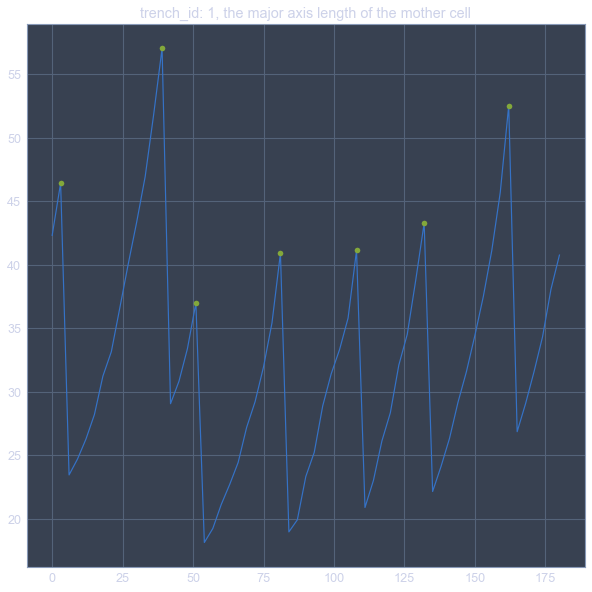

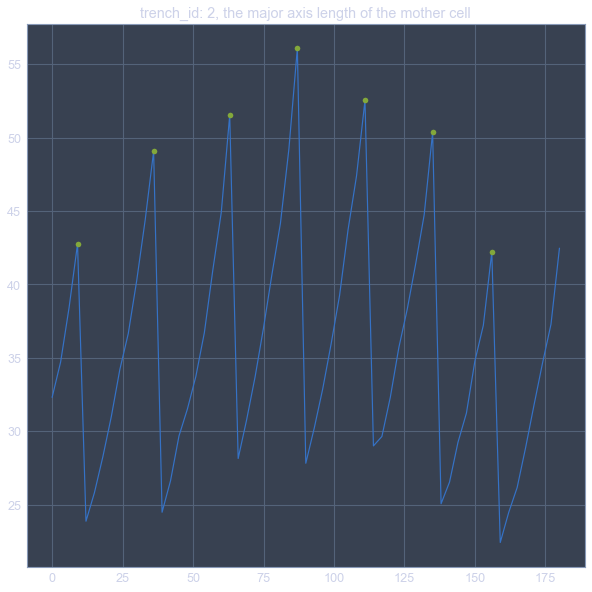

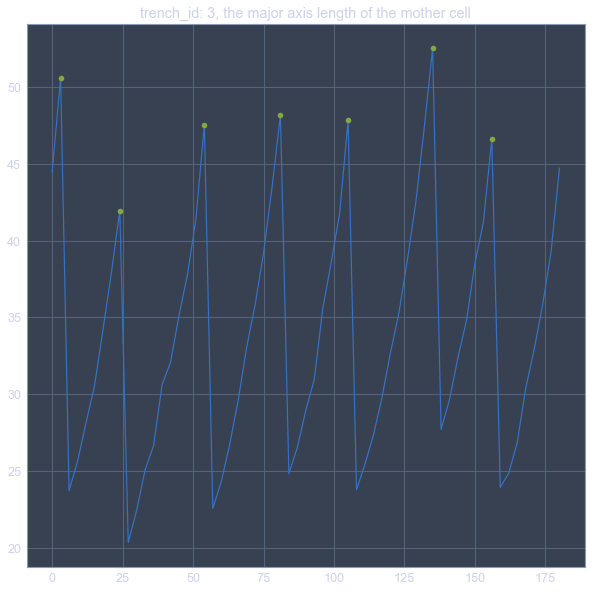

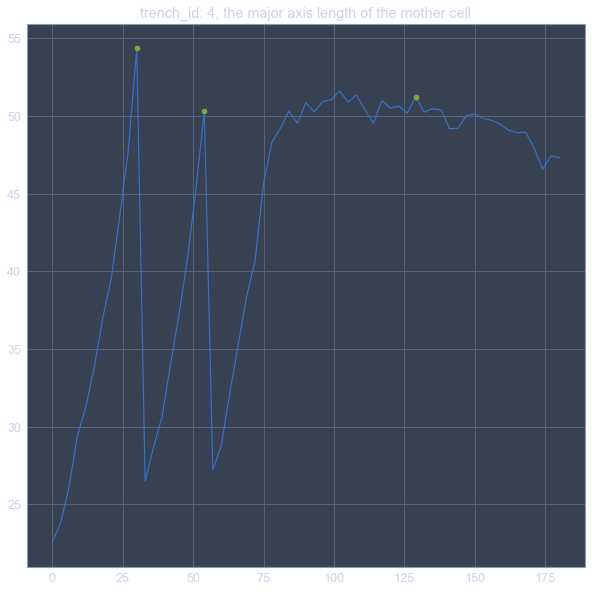

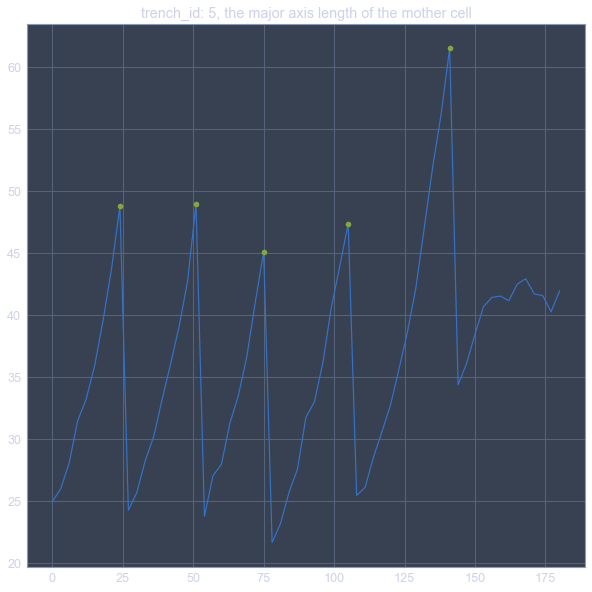

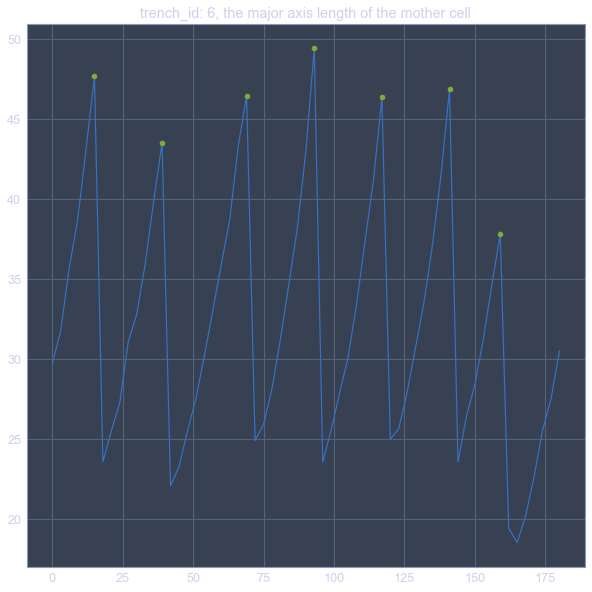

In [3]:
mcell1, idx1 = exp.find_division(1, plot=True)
mcell2, idx2 = exp.find_division(2, plot=True)
mcell3, idx3 = exp.find_division(3, plot=True)
mcell4, idx4 = exp.find_division(4, plot=True)
mcell5, idx5 = exp.find_division(5, plot=True)
mcell6, idx6 = exp.find_division(6, plot=True)

In [4]:
exp.collect_model_para(mcell1, idx1[:])
exp.collect_model_para(mcell2, idx2[:])
exp.collect_model_para(mcell3, idx3[:])
exp.collect_model_para(mcell4, idx4[:-1])
exp.collect_model_para(mcell5, idx5[:])
exp.collect_model_para(mcell6, idx6[:])

In [5]:
exp.update_model_para(model="unif")


                    The average time interval for division is 25.655172413793103
                    The time constant for exponential growth is (23.137463878547642, 2.069460316873865)
                    The average division length is 47.77963987077985 
                    with variance 27.847552656680012 and skewness 0.0703266976603631
                    The length for adder model is 23.568765311405578 
                    with variance 30.081901073983854 and skewness -0.1590870604309298
                    


0.1509955
6.453734


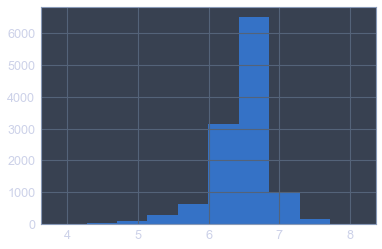

In [6]:
# exp.df.loc[:, "minor_axis_length"]
plt.hist(exp.df.loc[:, "minor_axis_length"])
print(np.var(exp.df.loc[:, "minor_axis_length"]))
print(np.mean(exp.df.loc[:, "minor_axis_length"]))

In [7]:
%autoreload
track_df1, lysis_df1 = exp.track_trench(trench=1, threshold=200, max_dpf=3, show_details=False, 
                                        ret_df=True, fill_gap=False, adap_dpf=True,
                                        drift=False, skew_model=True, update_para=True)

Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:06<00:00,  9.42it/s]


                    The average time interval for division is 26.0
                    The time constant for exponential growth is (21.936659464275266, 3.835498118108355)
                    The average division length is 44.7045353160185 
                    with variance 67.22613000706909 and skewness 0.7820215473681611
                    The length for adder model is 23.405018997192382 
                    with variance 60.1201352580173 and skewness 0.3820151629273252
                    


In [8]:
# display(HTML(track_df1.to_html()))
# display(HTML(lysis_df.to_html()))

In [9]:
vis1 = Visualiser("000", track_df1, lysis_df1)
# or Visualiser.from_path(FOV, path1, path2)

In [10]:
vis1.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)

saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


landscape_barcode_xy000_mCherry_TR1_T0-5-_epoch-20_prob-99.png


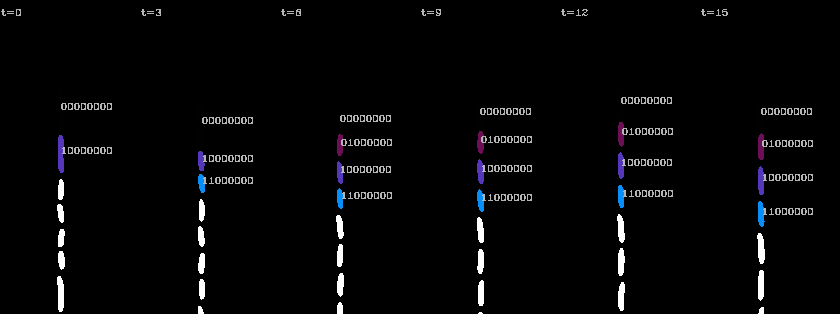

In [11]:
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
i = 1
print(files[i])
display(Image(directory+files[i], unconfined=True))

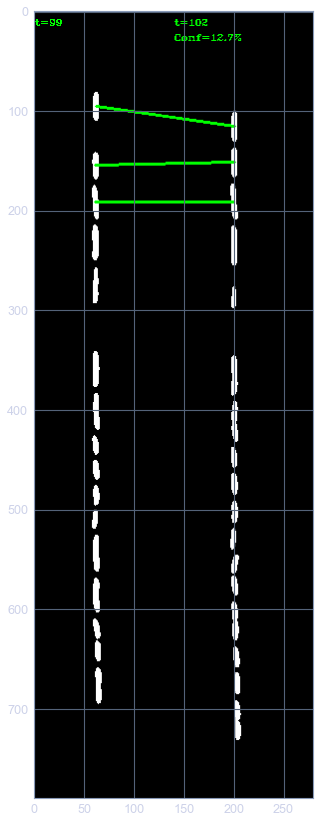

In [12]:
%autoreload
vis1.show_second_classification(1, 34, mask_dir, template=template_mask)

In [13]:
%autoreload
track_df2, lysis_df2 = exp.track_trench(trench=1, threshold=300, max_dpf=3, 
                                        search_mode="SeqMatch", probability_mode="sizer-adder", special_reporter=None, 
                                        show_details=False, ret_df=True, fill_gap=False, adap_dpf=True,
                                        drift=False, skew_model=True, update_para=True, cumulative=True)

Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:12<00:00,  4.97it/s]


                    The average time interval for division is 25.4
                    The time constant for exponential growth is (21.698811086224033, 2.602694749158042)
                    The average division length is 43.62495826952385 
                    with variance 41.17676457316969 and skewness 0.4945032663261757
                    The length for adder model is 21.887262535095214 
                    with variance 46.883044537790425 and skewness -0.19527229511832397
                    


In [14]:
# for cells in exp.all_cells[1]:
#     for cell in cells:
#         print(cell.barcode)
#         print(cell.poles)

In [15]:
display(HTML(track_df2.to_html()))

,trench_id,time_(mins),label,parent_label-1,confidence-1,parent_label-2,confidence-2,centroid,barcode,poles
0,1,0,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]","[None, None, None, None, None, None, None]",NaN,"[None, None, None, None, None, None, None]",NaN,"[(60.35348892211914, 109.33023071289062), (60.45933151245117, 153.464111328125), (60.48624038696289, 189.34861755371094), (60.21782302856445, 212.65347290039062), (60.7843132019043, 237.5490264892578), (61.0, 259.5887756347656), (60.197044372558594, 293.4532165527344)]","[0b0, 0b10000000, None, None, None, None, None]","[(0, 0), None, None, None, None, None, None]"
1,1,3,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]","[1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.184478,"[1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.157189,"[(60.71900939941406, 123.4504165649414), (60.63964080810547, 160.63063049316406), (61.13333511352539, 182.84762573242188), (61.26315689086914, 209.98245239257812), (60.70796585083008, 236.19468688964844), (61.224998474121094, 263.14166259765625), (61.48181915283203, 288.68182373046875)]","[0b0, 0b10000000, 0b11000000, None, None, None, None]","[(0, 0), None, None, None, None, None, None]"
2,1,6,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]","[1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.359610,"[1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.269786,"[(59.19658279418945, 120.62393188476562), (59.550846099853516, 144.6271209716797), (59.48695755004883, 172.2608642578125), (59.56190490722656, 198.13333129882812), (59.43283462524414, 226.38059997558594), (59.573768615722656, 255.22950744628906), (60.05223846435547, 284.14178466796875)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None]"
3,1,9,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]",0.540712,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]",0.070426,"[(59.484127044677734, 113.81745910644531), (60.219696044921875, 141.9469757080078), (60.080291748046875, 171.42335510253906), (60.132232666015625, 200.165283203125), (59.9862060546875, 229.77931213378906), (60.25899124145508, 261.0143737792969), (60.59440612792969, 292.8741149902344)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None]"
4,1,12,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]",0.485974,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]",0.072973,"[(60.5, 103.14179229736328), (60.58955383300781, 133.5223846435547), (60.45774459838867, 165.31689453125), (60.52032470703125, 195.94308471679688), (60.49382781982422, 228.3086395263672), (60.693748474121094, 261.59375), (60.94409942626953, 296.02484130859375)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None]"
5,1,15,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.356785,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.272248,"[(60.38194274902344, 113.77777862548828), (60.57432556152344, 146.479736328125), (60.51298522949219, 180.4870147705078), (60.50724792480469, 213.6086883544922), (60.60988998413086, 248.1813201904297), (60.54166793823242, 284.7797546386719)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None]","[(1, 0), (0, 1), None, None, None, None]"
6,1,18,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.686823,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",0.074622,"[(60.90184020996094, 111.05521392822266), (61.228572845458984, 146.36570739746094), (61.23295593261719, 182.75567626953125), (61.02531814575195, 218.51266479492188), (61.141414642333984, 255.97979736328125), (61.271793365478516, 296.0871887207031)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None]","[(1, 0), (0, 1), None, None, None, None]"
7,1,21,"[1.0, 2.0, 3.0, 4.0, 5.0]","[1.0, 2.0, 3.0, 4.0, 5.0]",0.520802,"[1.0, 2.0, 3.0, 4.0, 5.0]",0.395703,"[(59.82558059692383, 104.33721160888672), (60.04081726074219, 141.53060913085938), (60.36082458496094, 180.78350830078125), (60.01149368286133, 219.69540405273438), (60.1168212890625, 259.7383117675781)]","[0b0, 0b1

saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


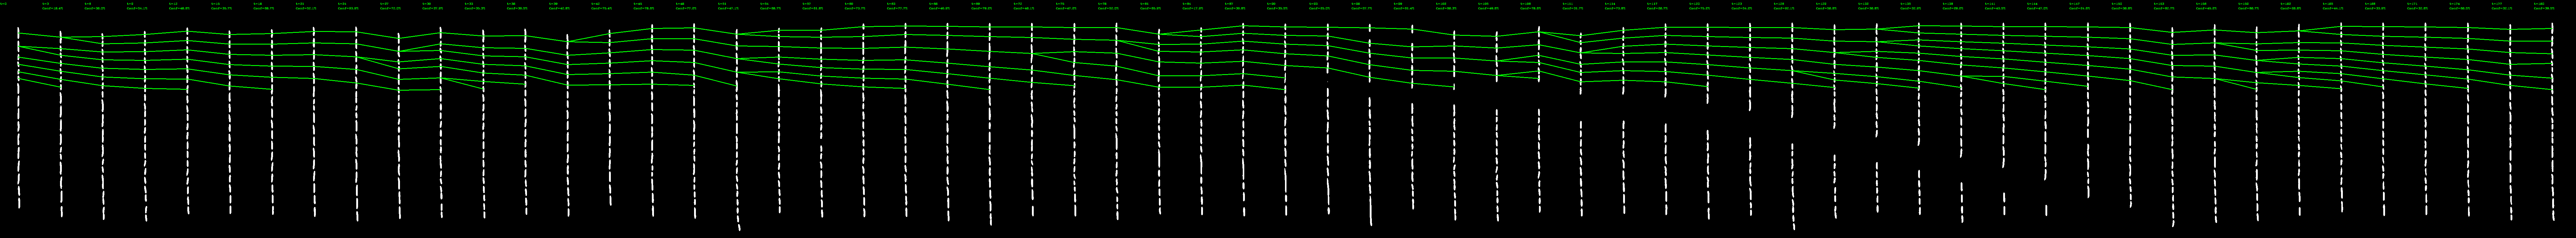

In [16]:
%autoreload
vis2 = Visualiser("000", track_df2, lysis_df2)
vis2.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[-1], unconfined=True))

saved as D:\UROP-Data\temp\\landscape_barcode_xy000_mCherry_TR1_T0-5-_epoch-20_prob-99.png


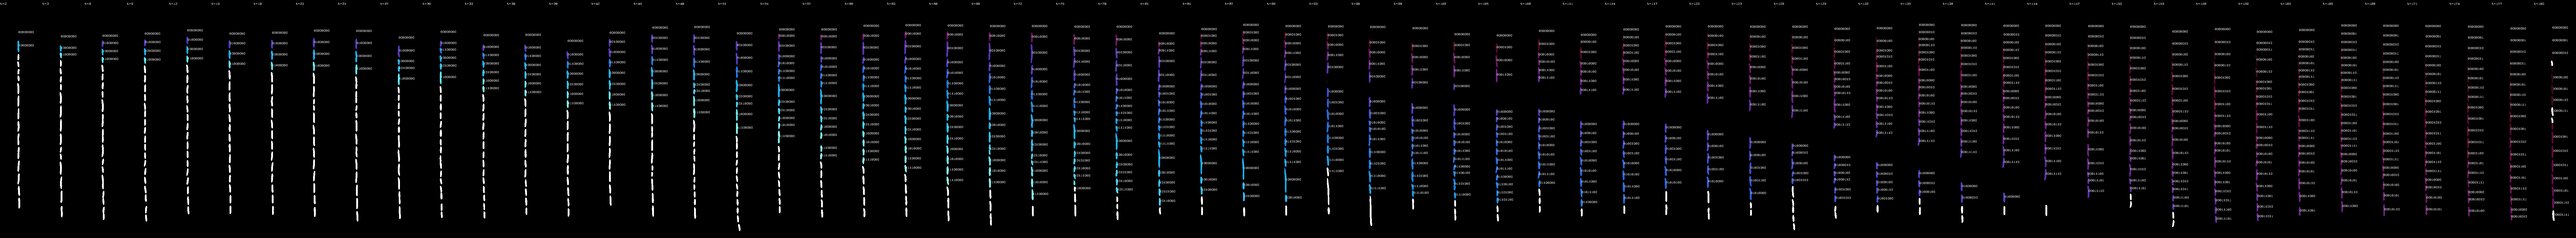

In [17]:
%autoreload
vis2.label_images(mask_dir, mode="landscape-colour-scale", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask, for_frames=[0, 5], colour_scale="inferno")
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[0], unconfined=True))

In [18]:
%autoreload
track_df3, lysis_df3 = exp.track_trench(trench=1, threshold=400, max_dpf=3, 
                                        search_mode="SeqMatch", probability_mode="sizer-adder", 
                                        special_reporter=None, show_details=False, ret_df=True, 
                                        fill_gap=False, adap_dpf=True, drift=False, skew_model=True, 
                                        update_para=True, cumulative=True)

Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:13<00:00,  4.43it/s]


                    The average time interval for division is 25.076923076923077
                    The time constant for exponential growth is (21.41363484945333, 2.435213513929071)
                    The average division length is 44.13010228474935 
                    with variance 39.54658834542325 and skewness 0.6740579760449517
                    The length for adder model is 22.242942272088467 
                    with variance 42.038826643192714 and skewness -0.017493620288386424
                    


saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


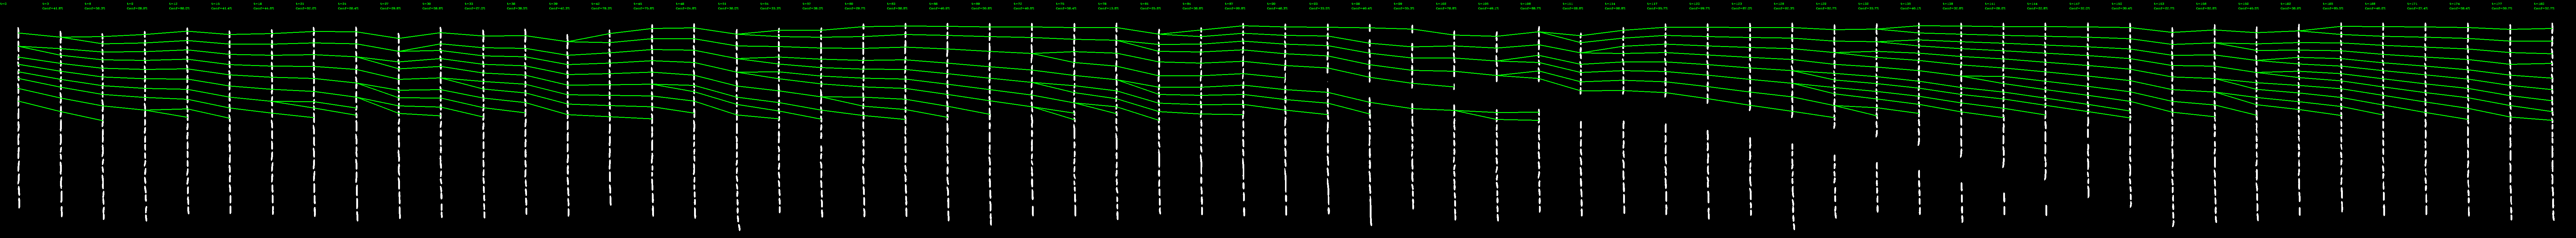

In [19]:
vis3 = Visualiser("000", track_df3, lysis_df3)
vis3.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[-1], unconfined=True))

In [20]:
%autoreload
track_df4, lysis_df4 = exp.track_trench(trench=1, threshold=500, max_dpf=3, 
                                        search_mode="SeqMatch", probability_mode="sizer-adder", 
                                        special_reporter=None, show_details=False, ret_df=True, 
                                        fill_gap=False, adap_dpf=True, drift=False, skew_model=True, 
                                        update_para=True, cumulative=True)

Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:16<00:00,  3.62it/s]


                    The average time interval for division is 24.73469387755102
                    The time constant for exponential growth is (21.27370329195986, 2.0295249600668157)
                    The average division length is 44.38321123284808 
                    with variance 32.9541730380926 and skewness 0.5828180233186581
                    The length for adder model is 22.199586206552933 
                    with variance 34.90047913919799 and skewness -0.041216334567400134
                    


saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


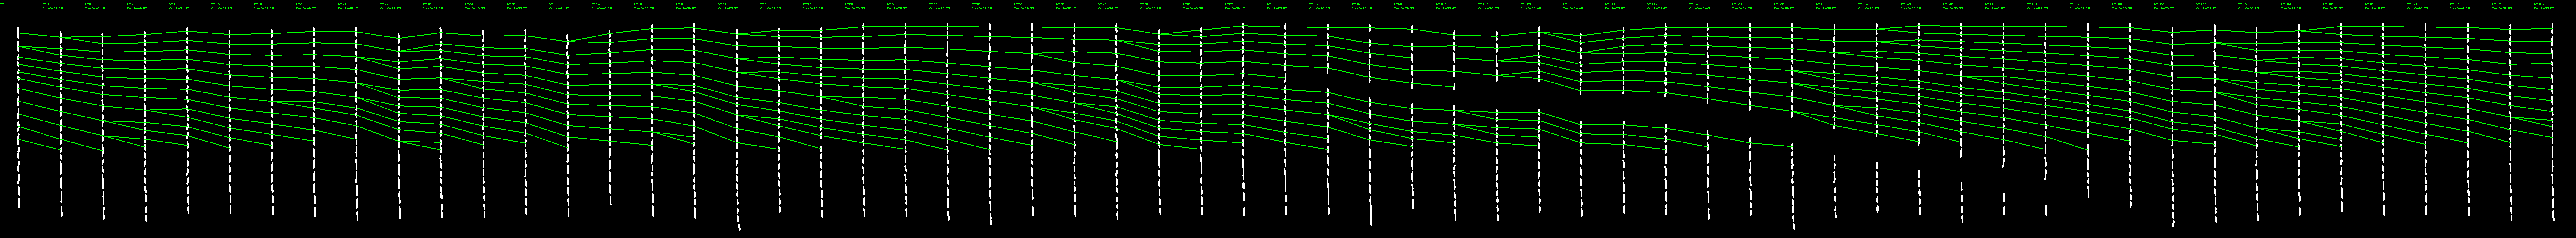

In [21]:
vis4 = Visualiser("000", track_df4, lysis_df4)
vis4.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[-1], unconfined=True))

In [22]:
%autoreload
track_df5, lysis_df5 = exp.track_trench(trench=1, threshold=600, max_dpf=3, 
                                        search_mode="SeqMatch", probability_mode="sizer-adder", 
                                        special_reporter=None, show_details=False, ret_df=True, 
                                        fill_gap=False, adap_dpf=True, drift=False, skew_model=True, 
                                        update_para=True, cumulative=True)

Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:17<00:00,  3.35it/s]


                    The average time interval for division is 24.2
                    The time constant for exponential growth is (21.183862852036413, 1.8694102283392426)
                    The average division length is 44.09157008856115 
                    with variance 29.8010733409235 and skewness 0.45260477023817014
                    The length for adder model is 21.74697192509969 
                    with variance 30.245557163727614 and skewness -0.0076791160463550055
                    


saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


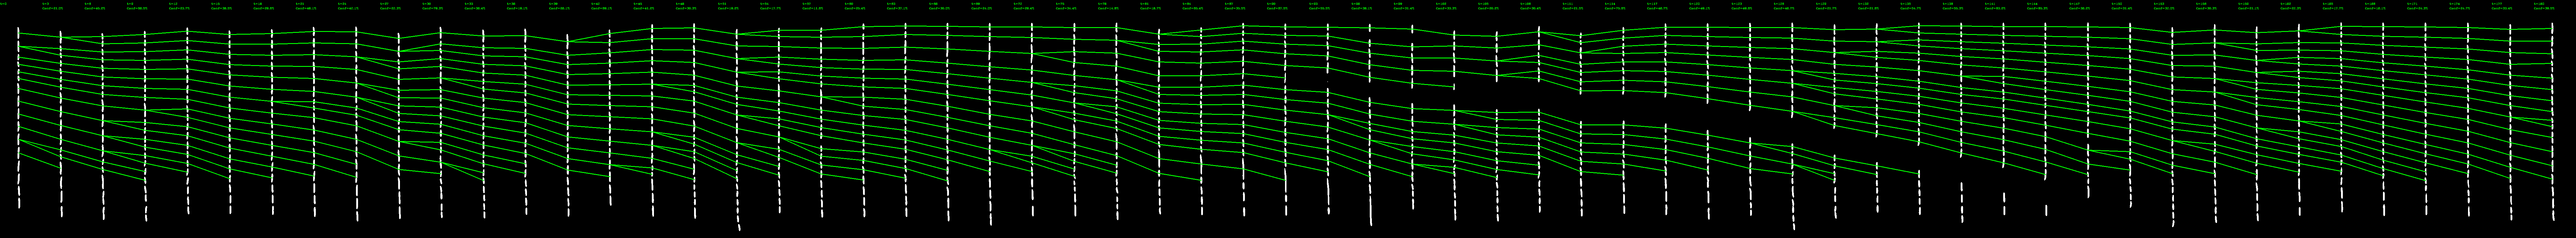

In [23]:
vis5 = Visualiser("000", track_df5, lysis_df5)
vis5.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[-1], unconfined=True))

In [24]:
%autoreload
track_df6, lysis_df6 = exp.track_trench(trench=1, threshold=700, max_dpf=3, 
                                        search_mode="SeqMatch", probability_mode="sizer-adder", 
                                        special_reporter=None, show_details=False, ret_df=True, 
                                        fill_gap=False, adap_dpf=True, drift=False, skew_model=True, 
                                        update_para=True, cumulative=True)

Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:19<00:00,  3.00it/s]


                    The average time interval for division is 24.12676056338028
                    The time constant for exponential growth is (21.012535124494644, 1.849324494589772)
                    The average division length is 44.239436603727796 
                    with variance 30.509195105930715 and skewness 0.33861746053555797
                    The length for adder model is 21.80891407711405 
                    with variance 28.581890710223206 and skewness -0.13415584684185858
                    


saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


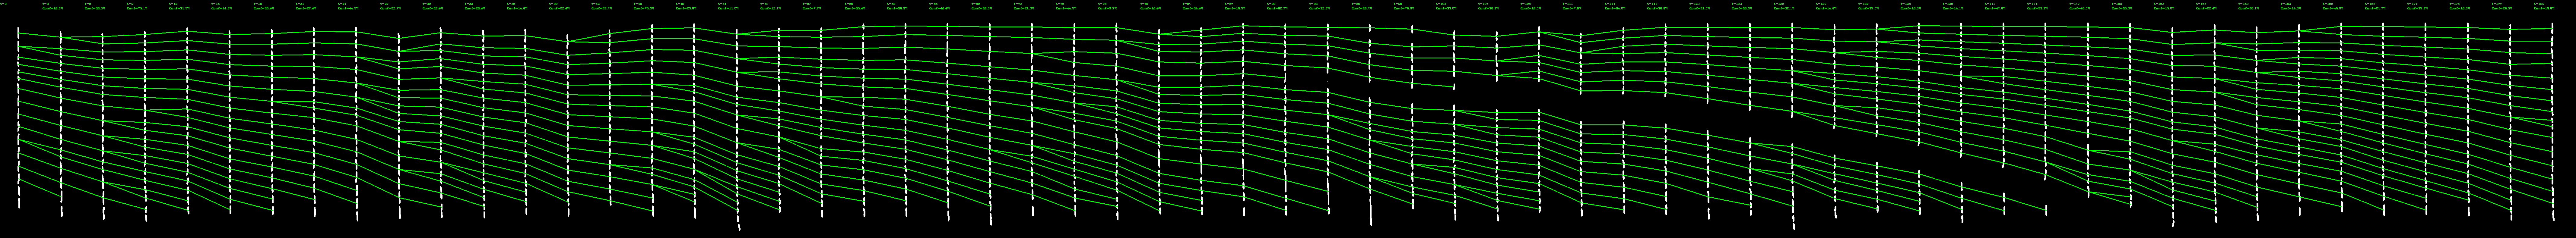

In [25]:
vis6 = Visualiser("000", track_df6, lysis_df6)
vis6.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[-1], unconfined=True))

In [26]:
display(HTML(track_df6.to_html()))

,trench_id,time_(mins),label,parent_label-1,confidence-1,parent_label-2,confidence-2,centroid,barcode,poles
0,1,0,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]","[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]",NaN,"[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]",NaN,"[(60.35348892211914, 109.33023071289062), (60.45933151245117, 153.464111328125), (60.48624038696289, 189.34861755371094), (60.21782302856445, 212.65347290039062), (60.7843132019043, 237.5490264892578), (61.0, 259.5887756347656), (60.197044372558594, 293.4532165527344), (60.49751281738281, 335.0547180175781), (60.67010498046875, 377.69586181640625), (60.76382064819336, 418.73870849609375), (60.50480651855469, 462.1730651855469), (60.92376708984375, 507.134521484375), (61.06999969482422, 551.0650024414062), (61.26633071899414, 593.060302734375), (62.441490173339844, 633.2925415039062), (63.2843132019043, 673.4558715820312)]","[0b0, 0b10000000, None, None, None, None, None, None, None, None, None, None, None, None, None, None]","[(0, 0), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]"
1,1,3,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]","[1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.0, 12.0, 13.0, 14.0]",0.185546,"[1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.0, 12.0, 13.0, 14.0]",0.176902,"[(60.71900939941406, 123.4504165649414), (60.63964080810547, 160.63063049316406), (61.13333511352539, 182.84762573242188), (61.26315689086914, 209.98245239257812), (60.70796585083008, 236.19468688964844), (61.224998474121094, 263.14166259765625), (61.48181915283203, 288.68182373046875), (60.922019958496094, 325.1054992675781), (61.22666549682617, 369.977783203125), (61.389381408691406, 416.1194763183594), (61.16054916381836, 461.8577880859375), (61.3232307434082, 496.6363525390625), (61.29906463623047, 519.5607299804688), (61.012046813964844, 557.51806640625), (62.09333419799805, 605.9866943359375), (63.39655303955078, 652.59912109375)]","[0b0, 0b10000000, 0b11000000, None, None, None, None, None, None, None, None, None, None, None, None, None]","[(0, 0), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]"
2,1,6,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]","[1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]",0.364798,"[1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]",0.363057,"[(59.19658279418945, 120.62393188476562), (59.550846099853516, 144.6271209716797), (59.48695755004883, 172.2608642578125), (59.56190490722656, 198.13333129882812), (59.43283462524414, 226.38059997558594), (59.573768615722656, 255.22950744628906), (60.05223846435547, 284.14178466796875), (59.66666793823242, 312.5087585449219), (59.844261169433594, 350.61065673828125), (60.041839599609375, 399.67364501953125), (60.40562438964844, 450.4859313964844), (60.092105865478516, 499.6842041015625), (60.75925827026367, 536.6574096679688), (60.26548767089844, 562.2566528320312), (60.35606002807617, 603.3219604492188), (62.320987701416016, 656.1810913085938)]","[0b0, 0b1000000, 0b10000000, 0b11000000, None, None, None, None, None, None, None, None, None, None, None, None]","[(1, 0), (0, 1), None, None, None, None, None, None, None, None, None, None, None, None, None, None]"
3,1,9,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 14.0, 15.0, 15.0, 16.0]",0.751111,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 14.0, 15.0, 15.0, 16.0]",0.116840,"[(59.484127044677734, 113.81745910644531), (60.219696044921875, 141.94

In [27]:
%autoreload
track_df7, lysis_df7 = exp.track_trench(trench=1, threshold=800, max_dpf=3, 
                                        search_mode="SeqMatch", probability_mode="sizer-adder", 
                                        special_reporter=None, show_details=False, ret_df=True, 
                                        fill_gap=False, adap_dpf=True, drift=False, skew_model=True, 
                                        update_para=True, cumulative=True)

Tracking over frames in trench 1:  12%|█████████████▏                                                                                                   | 7/60 [00:00<00:00, 66.58it/s]

NO Cells to track at 9
NO Cells to track at 12
NO Cells to track at 15


Tracking over frames in trench 1:  32%|███████████████████████████████████▍                                                                            | 19/60 [00:00<00:01, 35.86it/s]

NO Cells to track at 39
NO Cells to track at 42
NO Cells to track at 51
cell 1.0 at time 51.0


Tracking over frames in trench 1:  50%|████████████████████████████████████████████████████████                                                        | 30/60 [00:01<00:01, 26.00it/s]

NO Cells to track at 72
NO Cells to track at 78
NO Cells to track at 81
cell 2.0 at time 78.0
cell 1.0 at time 81.0
NO Cells to track at 87
NO Cells to track at 90
NO Cells to track at 96


Tracking over frames in trench 1:  63%|██████████████████████████████████████████████████████████████████████▉                                         | 38/60 [00:01<00:01, 17.77it/s]

NO Cells to track at 105
cell 3.0 at time 105.0
cell 4.0 at time 105.0
NO Cells to track at 111
cell 1.0 at time 108.0
NO Cells to track at 114
cell 3.0 at time 111.0


Tracking over frames in trench 1:  80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 48/60 [00:03<00:01,  8.88it/s]

NO Cells to track at 129
cell 5.0 at time 126.0
cell 6.0 at time 126.0
cell 8.0 at time 126.0
NO Cells to track at 132
cell 3.0 at time 129.0
cell 9.0 at time 129.0
cell 1.0 at time 132.0
cell 2.0 at time 132.0
NO Cells to track at 138
NO Cells to track at 141
cell 7.0 at time 138.0
NO Cells to track at 144
NO Cells to track at 147
cell 13.0 at time 147.0
cell 17.0 at time 147.0


Tracking over frames in trench 1:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████               | 52/60 [00:04<00:00,  8.49it/s]

cell 15.0 at time 150.0
cell 11.0 at time 153.0


Tracking over frames in trench 1:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 56/60 [00:05<00:00,  6.31it/s]

cell 2.0 at time 156.0
cell 5.0 at time 156.0
cell 6.0 at time 156.0
NO Cells to track at 162
cell 4.0 at time 159.0
cell 5.0 at time 159.0
cell 11.0 at time 159.0
NO Cells to track at 165
cell 1.0 at time 162.0
cell 12.0 at time 162.0
NO Cells to track at 168


Tracking over frames in trench 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:06<00:00,  9.72it/s]

cell 4.0 at time 177.0
cell 9.0 at time 177.0

                    The average time interval for division is 24.12676056338028
                    The time constant for exponential growth is (21.012535124494644, 1.849324494589772)
                    The average division length is 44.239436603727796 
                    with variance 30.509195105930715 and skewness 0.33861746053555797
                    The length for adder model is 21.80891407711405 
                    with variance 28.581890710223206 and skewness -0.13415584684185858
                    


saved as D:\UROP-Data\temp\\landscape_line_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


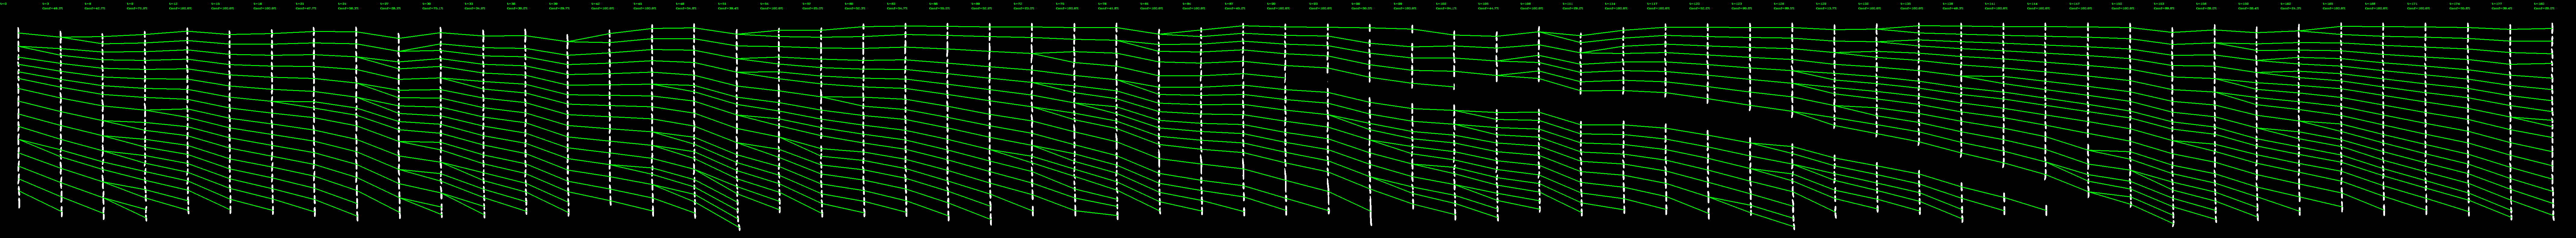

In [28]:
vis7 = Visualiser("000", track_df7, lysis_df7)
vis7.label_images(mask_dir, mode="landscape-line", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask)
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[-1], unconfined=True))

saved as D:\UROP-Data\temp\\landscape_barcode_xy000_mCherry_TR1_T-_epoch-20_prob-99.png


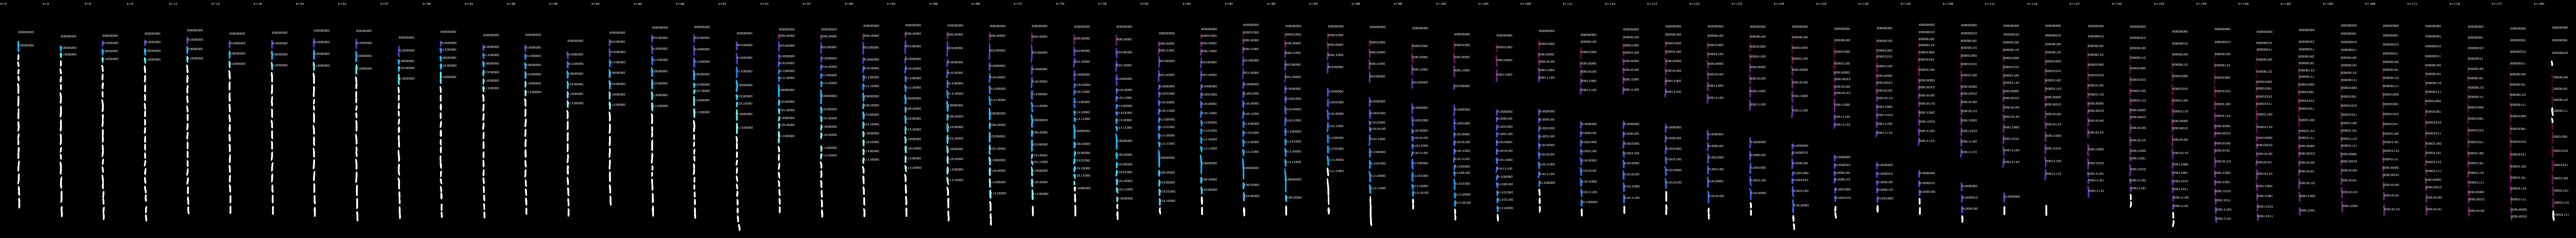

In [29]:
%autoreload
vis7.label_images(mask_dir, mode="landscape-colour-scale", 
                  save_dir="D:\\UROP-Data\\temp\\", 
                  template=template_mask, for_frames=None, colour_scale="inferno")
directory = "D:\\UROP-Data\\temp\\"
files = [f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))]
display(Image(directory+files[0], unconfined=True))